# Notebook Instructions
<i>You can run the notebook document sequentially (one cell a time) by pressing <b> shift + enter</b>. While a cell is running, a [*] will display on the left. When it has been run, a number will display indicating the order in which it was run in the notebook [8].</i>

<i>Enter edit mode by pressing <b>`Enter`</b> or using the mouse to click on a cell's editor area. Edit mode is indicated by a green cell border and a prompt showing in the editor area.</i>

# Monte Carlo Simulation

Monte Carlo simulation is another non-parametric method to calculate VaR which corresponds to an algorithm that generates random numbers (stocks returns). We run a Monte Carlo simulation based on a geometric Brownian motion to get stock returns. It is important to note that, in each simulation, we would get a different result, although it is highly likely that differences would be narrow. Then we arrange the randomly generated stocks return from worst to best and compute VaR for 90%, 95%, and 99% confidence levels, similar to the historical approach.

## Importing the libraries

In [1]:
# Data manipulation
import numpy as np
import pandas as pd
import numpy.random as npr

# Plotting 
import matplotlib.pyplot as plt
import seaborn

# Tabular data output
from tabulate import tabulate

## Simulate daily returns

The stock daily returns are simulated by geometric Brownian motion. The steps followed are as follows:
1. Define the paramters required to generate random stock returns
2. Generate random stock returns
3. Sort and plot the histogram of the returns

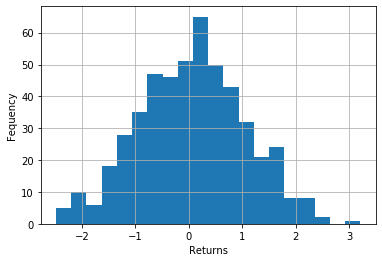

In [2]:
# Parameters
S0 = 100         # Stock price at T0
mean = 0.0         
sigma = 0.20      
T = 1/365.      # Time period
I = 500        # Number of Simulations

# Generate returns & sort
ST = S0 * np.exp((mean - 0.5 * sigma ** 2) * T + sigma * np.sqrt (T) * npr.standard_normal(I))
R_gbm = np.sort(ST - S0)

# Plot the histogram of the returns
plt.hist(R_gbm, bins=20)
plt.xlabel('Returns')
plt.ylabel('Fequency')
plt.grid(True)
plt.show()

## Calculate the VaR

Calculate VaR using numpy percentile function.

In [3]:
VaR_90 = np.percentile(R_gbm,0.1)
VaR_95 = np.percentile(R_gbm,0.05)
VaR_99 = np.percentile(R_gbm,0.01)

print(tabulate([['90%', VaR_90], ['95%', VaR_95], ["99%", VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                        -2.46837
95%                        -2.47505
99%                        -2.4804


It is important to note that, in each simulation, we would get a different result.
In the next unit, there will be MCQ exercise. All the best!<br><br>